In [17]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


In [18]:
# Load the breast cancer dataset

bc = load_breast_cancer()
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [19]:
bc.target
bc.data.shape

(569, 30)

In [20]:
# preprocess the data

X_train , X_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.2)
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Classification

In [21]:
# create a metrics function to evaluate the model

from sklearn.metrics import accuracy_score , recall_score, precision_score

def calculate_metrics(y_train , y_test , y_pred_tr , y_pred_te):
    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_tr)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_te)

    p = precision_score(y_true=y_test, y_pred=y_pred_te)
    r = recall_score(y_true=y_test, y_pred=y_pred_te)

    print(f'acc train={acc_train}, acc test={acc_test}, p={p}, r={r}')

    return acc_train, acc_test, p, r

In [22]:
# Naive Bayes Classifier

GNB = GaussianNB()
GNB.fit(X_train, y_train)

y_pred_tr = GNB.predict(X_train)
y_pred_te = GNB.predict(X_test)

acc_train_GNB, acc_test_GNB, p_GNB, r_GNB = calculate_metrics(y_train, y_test, y_pred_tr, y_pred_te)

acc train=0.9406593406593406, acc test=0.9385964912280702, p=0.9420289855072463, r=0.9558823529411765


In [23]:
# K-Nearest Neighbors Classifier (KNN)

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

y_pred_tr = knn.predict(X_train)
y_pred_te = knn.predict(X_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(y_train, y_test, y_pred_tr, y_pred_te)

acc train=0.9802197802197802, acc test=0.9473684210526315, p=0.9305555555555556, r=0.9852941176470589


In [24]:
# Decision Tree Classifier

dt = DecisionTreeClassifier(max_depth=256 , min_samples_split=2 , criterion='gini')
dt.fit(X_train, y_train)

y_pred_tr = dt.predict(X_train)
y_pred_te = dt.predict(X_test)

acc_train_dt, acc_test_dt, p_dt, r_dt = calculate_metrics(y_train, y_test, y_pred_tr, y_pred_te)

acc train=1.0, acc test=0.956140350877193, p=0.9701492537313433, r=0.9558823529411765


In [25]:
# Random Forest Classifier

rf = RandomForestClassifier(n_estimators=1000 , max_depth=48 , min_samples_split=2)
rf.fit(X_train, y_train)

y_pred_tr = rf.predict(X_train)
y_pred_te = rf.predict(X_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metrics(y_train, y_test, y_pred_tr, y_pred_te)

acc train=1.0, acc test=0.956140350877193, p=0.9565217391304348, r=0.9705882352941176


In [26]:
# Support Vector Machine Classifier (SVM)

svm = SVC(kernel='poly')
svm.fit(X_train, y_train)

y_pred_tr = svm.predict(X_train)
y_pred_te = svm.predict(X_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metrics(y_train, y_test, y_pred_tr, y_pred_te)

acc train=0.9868131868131869, acc test=0.9649122807017544, p=0.9571428571428572, r=0.9852941176470589


In [27]:
# Logistic Regression Classifier

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred_te = lr.predict(X_test)

acc_train_lr, acc_test_lr, p_lr, r_lr = calculate_metrics(y_train, y_test, y_pred_tr, y_pred_te)

acc train=0.967032967032967, acc test=0.9473684210526315, p=0.9305555555555556, r=0.9852941176470589


In [28]:
# Neural Network Classifier (ANN)

ann = MLPClassifier(hidden_layer_sizes=512 , max_iter=1000)
ann.fit(X_train, y_train)

y_pred_tr = ann.predict(X_train)
y_pred_te = ann.predict(X_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(y_train, y_test, y_pred_tr, y_pred_te)

acc train=0.989010989010989, acc test=0.9912280701754386, p=0.9855072463768116, r=1.0


## Compare the models

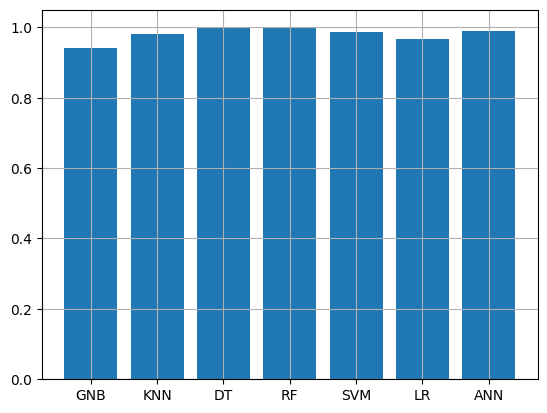

In [29]:
# Plot train data accuracy for models

acc_train = [acc_train_GNB, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm, acc_train_lr, acc_train_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
import matplotlib.pyplot as plt
plt.bar(title, acc_train)
plt.grid()

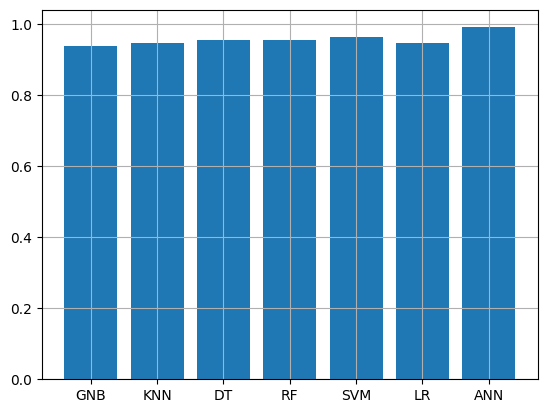

In [30]:
# Plot test data accuracy for models

acc_test = [acc_test_GNB, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr, acc_test_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
plt.bar(title, acc_test)
plt.grid()

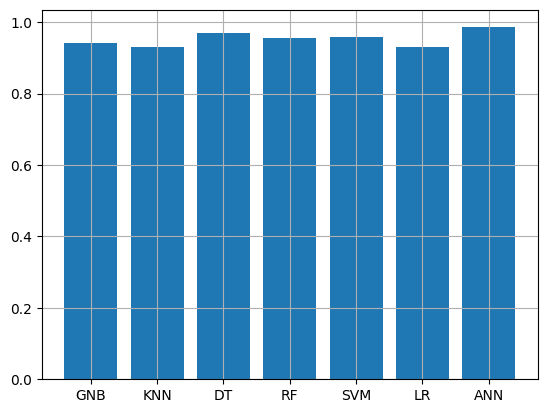

In [31]:
# Plot precission for models

p_test = [p_GNB, p_knn, p_dt, p_rf, p_svm, p_lr, p_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
plt.bar(title, p_test)
plt.grid()

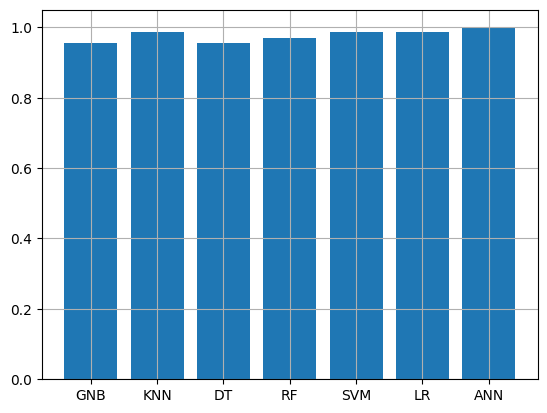

In [32]:
# Plot recall for models

r_test = [r_GNB, r_knn, r_dt, r_rf, r_svm, r_lr, r_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
plt.bar(title, r_test)
plt.grid()